In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv("yelp.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [4]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [10]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [13]:
# new column 'text_length' for the number of words in each review
df['text_length'] = df['text'].apply(len)

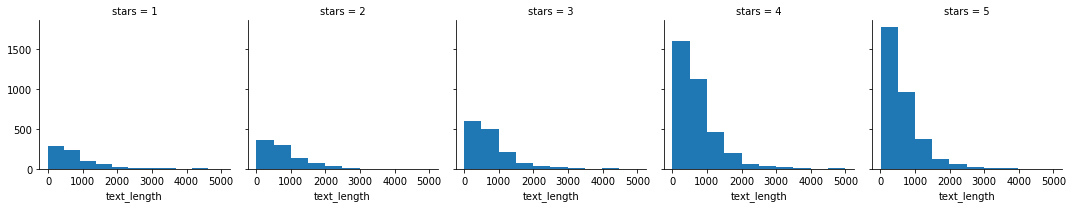

In [24]:
# distribution plot for 'stars'
g = sns.FacetGrid(df, col='stars')
g.map(plt.hist, 'text_length')

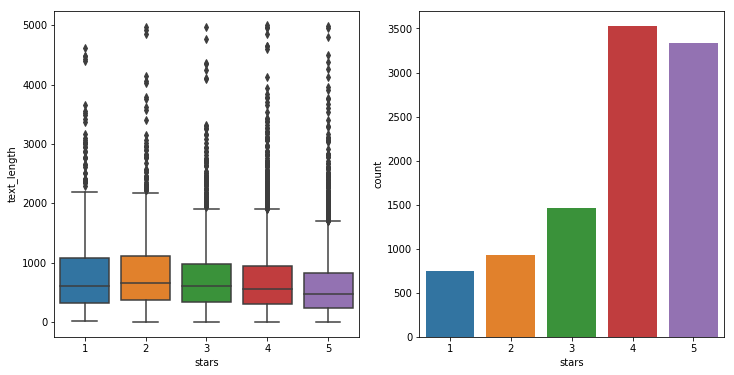

In [36]:
# box plot for 'text_length', and count plot each 'star' rating
fig, axes = plt.subplots(1,2, figsize=(12,6))
sns.boxplot('stars', 'text_length', data=df, ax=axes[0])
sns.countplot('stars', data=df, ax=axes[1])

In [38]:
df_stars = df.groupby('stars').mean()

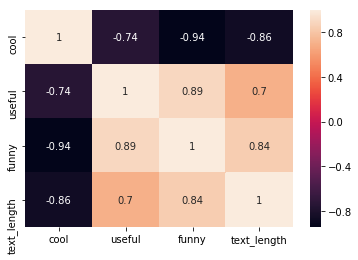

In [40]:
# correlation heatmap for 'stars'
sns.heatmap(df_stars.corr(), annot=True)

In [41]:
X = df['text']
y = df['stars']

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
cv = CountVectorizer()

In [44]:
X = cv.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [47]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
nb = MultinomialNB()

In [49]:
nb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [50]:
nb.predict(X_test)

array([4, 5, 4, ..., 4, 5, 4], dtype=int64)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
print(confusion_matrix(y_test, nb.predict(X_test)))
print(classification_report(y_test, nb.predict(X_test)))

[[ 38  18  19  54  13]
 [ 19  15  36 111  23]
 [  2   7  38 210  25]
 [ 11   5  23 485 197]
 [  5   1   6 258 381]]
             precision    recall  f1-score   support

          1       0.51      0.27      0.35       142
          2       0.33      0.07      0.12       204
          3       0.31      0.13      0.19       282
          4       0.43      0.67      0.53       721
          5       0.60      0.59      0.59       651

avg / total       0.46      0.48      0.45      2000



In [68]:
x = df[(df['stars'] == 1) | (df['stars'] == 5)]['text']
y = df[(df['stars'] == 1) | (df['stars'] == 5)]['stars']

In [69]:
x = cv.fit_transform(x)

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [71]:
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
print(confusion_matrix(y_test, nb.predict(x_test)))
print(classification_report(y_test, nb.predict(x_test)))

[[106  45]
 [ 26 641]]
             precision    recall  f1-score   support

          1       0.80      0.70      0.75       151
          5       0.93      0.96      0.95       667

avg / total       0.91      0.91      0.91       818

